### Importe de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
       + 'Estadistica-machine-learning-python/master/data/spam.csv'
datos = pd.read_csv(url)
datos['type'] = np.where(datos['type'] == 'spam', 1, 0)

In [3]:
datos.head()

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
datos.shape

(4601, 58)

In [5]:
datos['type'].value_counts()

type
0    2788
1    1813
Name: count, dtype: int64

In [6]:
datos['type'].value_counts(normalize = True)

type
0    0.605955
1    0.394045
Name: proportion, dtype: float64

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               4601 non-null   float64
 1   address            4601 non-null   float64
 2   all                4601 non-null   float64
 3   num3d              4601 non-null   float64
 4   our                4601 non-null   float64
 5   over               4601 non-null   float64
 6   remove             4601 non-null   float64
 7   internet           4601 non-null   float64
 8   order              4601 non-null   float64
 9   mail               4601 non-null   float64
 10  receive            4601 non-null   float64
 11  will               4601 non-null   float64
 12  people             4601 non-null   float64
 13  report             4601 non-null   float64
 14  addresses          4601 non-null   float64
 15  free               4601 non-null   float64
 16  business           4601 

<Axes: ylabel='Density'>

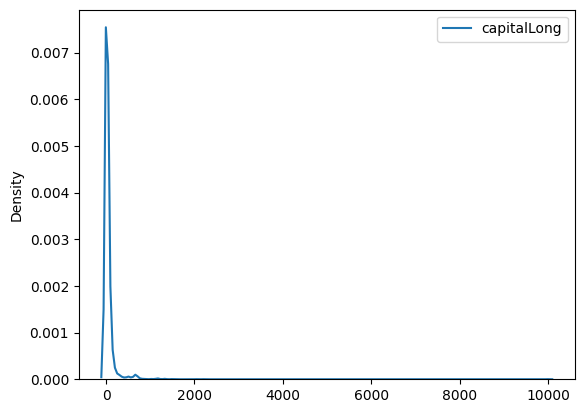

In [8]:
sns.kdeplot(datos[['capitalLong']])

## Ajuste del modelo

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
        datos.drop(columns='type'), datos['type'], test_size =0.3, random_state=123)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

classifier = Pipeline([('scaler', StandardScaler()),
                       ('logistic Regession', LogisticRegression())])


classifier.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic Regession', LogisticRegression())])

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

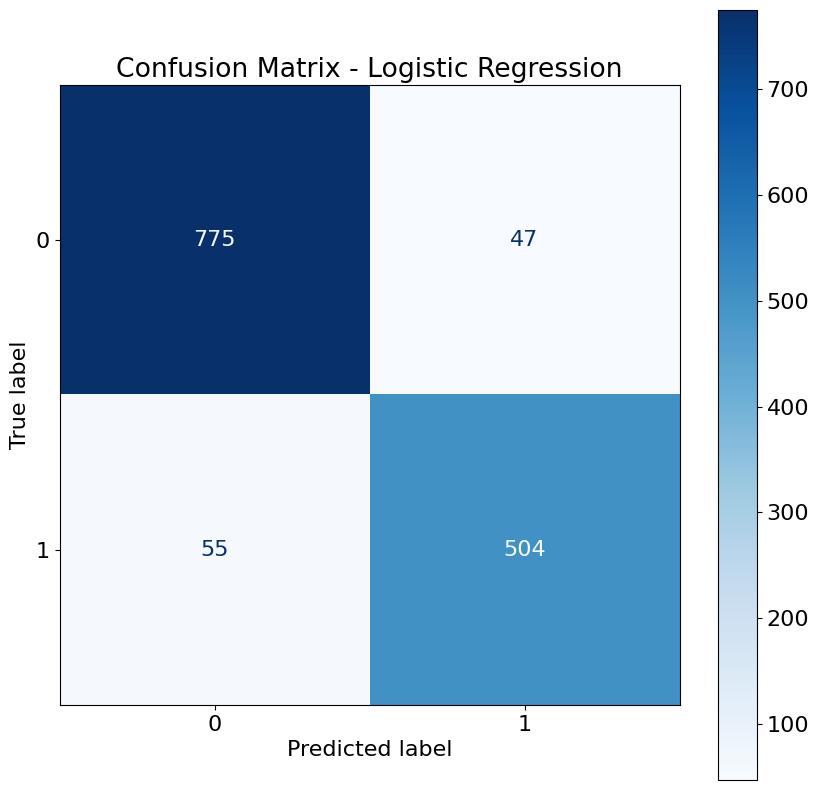

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(classifier,
                                             xtest,
                                             ytest,
                                             display_labels=classifier.classes_,
                                             cmap=plt.cm.Blues,
                                             ax=axes
                                             )
disp.ax_.set_title('Confusion Matrix - Logistic Regression')

In [12]:
ypred = classifier.predict(xtest)

In [13]:
from sklearn.metrics import classification_report
target_names = ['Not Admited', 'Admitted']
print(classification_report(ytest, ypred, target_names=target_names))

              precision    recall  f1-score   support

 Not Admited       0.93      0.94      0.94       822
    Admitted       0.91      0.90      0.91       559

    accuracy                           0.93      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



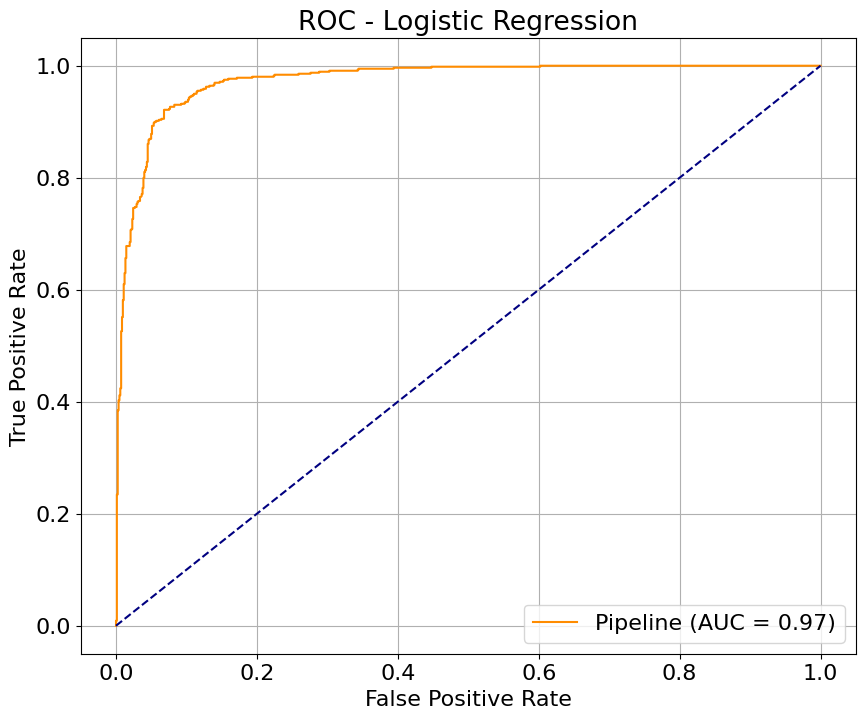

In [14]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()
fig.set_size_inches(10,8)
RocCurveDisplay.from_estimator(classifier, xtest, ytest, ax=ax, color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Logistic Regression")
plt.grid()
plt.show()

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
X_train = xtrain.astype(float)
y_train = ytrain.astype(float)
X_train = sm.add_constant(X_train, prepend = True)
y_train = ytrain.values.reshape(-1,1)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

         Current function value: 0.195339
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3220
Model:                          Logit   Df Residuals:                     3162
Method:                           MLE   Df Model:                           57
Date:                Fri, 03 May 2024   Pseudo R-squ.:                  0.7078
Time:                        23:38:16   Log-Likelihood:                -628.99
converged:                      False   LL-Null:                       -2152.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.6953      0.187     -9.061      0.000      -2.062      -1.329
make                 -0.3852      0.299     

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [18]:
predicciones = modelo.predict(exog = X_train)
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

array([0, 0, 1, ..., 1, 0, 0])

In [19]:
from sklearn.metrics import classification_report
target_names = ['Not sapm', 'spam']
print(classification_report(ytrain, clasificacion, target_names=target_names))

              precision    recall  f1-score   support

    Not sapm       0.93      0.95      0.94      1966
        spam       0.92      0.89      0.91      1254

    accuracy                           0.93      3220
   macro avg       0.93      0.92      0.92      3220
weighted avg       0.93      0.93      0.93      3220



In [20]:
print(X_train.shape)
print(xtest.shape)

(3220, 58)
(1381, 57)


In [21]:
predicciones = modelo.predict(exog = sm.add_constant(xtest.astype(float), prepend = True))
clasificacion_test = np.where(predicciones<0.5, 0, 1)
clasificacion_test

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


array([0, 1, 0, ..., 1, 1, 1])

In [23]:
from sklearn.metrics import classification_report
target_names = ['Not sapm', 'spam']
print(classification_report(ytest, clasificacion_test, target_names=target_names))

              precision    recall  f1-score   support

    Not sapm       0.93      0.93      0.93       822
        spam       0.90      0.90      0.90       559

    accuracy                           0.92      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381

